# KNN Algorithm, XGBoosting

In [1]:
import pandas as pd
cardiovascular_data = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/ctd_cadiovascular_20240223_scores.tsv", sep='\t')
cardiovascular_data1 = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\primekg_cardiovascular_20240223_scores.tsv", sep='\t')
neoplasm_data = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/ctd_neoplasm_20240220_scores.tsv", sep='\t')
neoplasm_data1 = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\primekg_neoplasm_20240222_scores.tsv", sep='\t')
nervous_system_data = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/ctd_nervous-system_20240223_scores.tsv", sep='\t')
nervous_system_data1 = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\primekg_nervous-system_20240223_scores.tsv", sep='\t')
hypertension_data = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/ctd_hypertension_20240223_scores.tsv", sep='\t')
hypertension_data1 = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\primekg_hypertension_20240223_scores.tsv", sep='\t')

ground_truth_cardiovascular = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/Softwarepraktikum/merged_cardio.tsv", sep='\t')
ground_truth_neoplasm = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/Softwarepraktikum/merged_Neoplasm.tsv", sep='\t')
ground_truth_nervous_system = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/Softwarepraktikum/merged_nerveSys.tsv", sep='\t')
ground_truth_hypertension = pd.read_csv("C:/Users/sshor/Desktop/Softwarepraktikum2024/Softwarepraktikum/merged_hyperhyper.tsv", sep='\t')

## Checking for NAs

In [5]:
for disease, data1, data2, ground_truth in zip(["cardiovascular", "neoplasm", "nervous_system", "hypertension"], 
                                                [cardiovascular_data, neoplasm_data, nervous_system_data, hypertension_data], 
                                                [cardiovascular_data1, neoplasm_data1, nervous_system_data1, hypertension_data1], 
                                                [ground_truth_cardiovascular, ground_truth_neoplasm, ground_truth_nervous_system, ground_truth_hypertension]):
    print(f"Processing {disease} dataset...")
 
    merged_data1 = ground_truth.merge(data1, on=['drugA', 'drugB'], how="left")
    merged_data2 =  ground_truth.merge(data2, on=['drugA', 'drugB'], how="left")

    nas_data1 = merged_data1.isna().mean() * 100
    nas_data1 = nas_data1[nas_data1 > 0]

    nas_data2 = merged_data2.isna().mean() * 100
    nas_data2 = nas_data2[nas_data2 > 0]

    nas_data1.to_csv(f"C:/Users/sshor/Desktop/Softwarepraktikum2024/NAs Scores/{disease}_ctd_na_percentages.csv")
    nas_data2.to_csv(f"C:/Users/sshor/Desktop/Softwarepraktikum2024/NAs Scores/{disease}_primekg_na_percentages.csv")

    print(f"{disease} dataset processed successfully.")

Processing cardiovascular dataset...
cardiovascular dataset processed successfully.
Processing neoplasm dataset...
neoplasm dataset processed successfully.
Processing nervous_system dataset...
nervous_system dataset processed successfully.
Processing hypertension dataset...
hypertension dataset processed successfully.


## Removing NA containing columns and lines

In [10]:
from tqdm import tqdm 

for disease, data1, data2, ground_truth in zip(["cardiovascular", "neoplasm", "nervous_system", "hypertension"], 
                                                [cardiovascular_data, neoplasm_data, nervous_system_data, hypertension_data], 
                                                [cardiovascular_data1, neoplasm_data1, nervous_system_data1, hypertension_data1], 
                                                [ground_truth_cardiovascular, ground_truth_neoplasm, ground_truth_nervous_system, ground_truth_hypertension]):
    try:
        print(f"Processing {disease} dataset...")

        merged_data1 = ground_truth.merge(data1, on=['drugA', 'drugB'], how="left")
        merged_data2 = ground_truth.merge(data2, on=['drugA', 'drugB'], how="left")

        merged_data1 = merged_data1.dropna(axis=0, how='all')
        merged_data1 = merged_data1.dropna(axis=1, how='all')

        merged_data2 = merged_data2.dropna(axis=0, how='all')
        merged_data2 = merged_data2.dropna(axis=1, how='all')
        
        for column in tqdm(merged_data1.columns):
            merged_data1 = merged_data1[merged_data1[column].notnull()]

        for column in tqdm(merged_data2.columns):
            merged_data2 = merged_data2[merged_data2[column].notnull()]

        merged_data1.to_csv(f"C:/Users/sshor/Desktop/Softwarepraktikum2024/Preprocessed/{disease}_ctd_preprocessed.csv", index=False)
        merged_data2.to_csv(f"C:/Users/sshor/Desktop/Softwarepraktikum2024/Preprocessed/{disease}_primekg_preprocessed.csv", index=False)

        print(f"{disease} dataset processed successfully.")
    except Exception as e:
        print(f"An error occurred while processing {disease} dataset: {str(e)}")


Processing cardiovascular dataset...


100%|██████████| 26/26 [00:00<00:00, 114.61it/s]


cardiovascular dataset processed successfully.
Processing neoplasm dataset...


100%|██████████| 26/26 [00:00<00:00, 197.23it/s]


neoplasm dataset processed successfully.
Processing nervous_system dataset...


100%|██████████| 26/26 [00:00<00:00, 63.43it/s]


nervous_system dataset processed successfully.
Processing hypertension dataset...


100%|██████████| 26/26 [00:00<00:00, 285.29it/s]


hypertension dataset processed successfully.


## Data Preprocessing - Cardiovascular Datasets

In [113]:
cardio_primekg_prepped = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\Preprocessed\cardiovascular_primekg_preprocessed.csv")
cardio_ctd_prepped = pd.read_csv(r"C:\Users\sshor\Desktop\Softwarepraktikum2024\Preprocessed\cardiovascular_ctd_preprocessed.csv")

In [114]:
cardio_ctd_prepped.shape

(48800, 26)

In [115]:
cardio_primekg_prepped.columns

Index(['drugA', 'drugB', 'drugcomb', 'adv/app', 'sAB', 'opAB', 'meanspAB',
       'medianspAB', 'minspAB', 'maxspAB', 'zTDA', 'zTDB', 'zDTA', 'zDTB',
       'sAD', 'sBD', 'opAD', 'opBD', 'meanspAD', 'meanspBD', 'medianspAD',
       'medianspBD', 'minspAD', 'minspBD', 'maxspAD', 'maxspBD'],
      dtype='object')

In [116]:
#deleting drugcomb column so it doesnt cause errors
cardio_ctd_prepped = cardio_ctd_prepped.drop(columns=['drugcomb'], axis=1)

In [117]:
cardio_primekg_prepped = cardio_primekg_prepped.drop(columns=['drugcomb'], axis=1)

In [118]:
# Couldnt call KNNClassifier because of NAs, tried to troubleshoot this, but still getting errors
cardio_ctd_prepped.replace(['', 'NA', 'N/A', 'NaN', 'nan'], pd.NA, inplace=True)
cardio_primekg_prepped.replace(['', 'NA', 'N/A', 'NaN', 'nan'], pd.NA, inplace=True)

cardio_ctd_prepped.dropna(how='any', inplace=True)
cardio_primekg_prepped.dropna(how='any', inplace=True)


In [122]:
#loop approach
def standardize_na_values(df):
    na_values_str = ['NA', 'N/A', 'NaN', 'nan']
    df.replace(na_values_str, np.nan, inplace=True)
    return df

cardio_ctd_prepped = standardize_na_values(cardio_ctd_prepped)
cardio_primekg_prepped = standardize_na_values(cardio_primekg_prepped)

# Now you can drop the NaN values safely
cardio_ctd_prepped.dropna(how='any', inplace=True)
cardio_primekg_prepped.dropna(how='any', inplace=True)


In [123]:
missing_values = cardio_primekg_prepped.isna().sum()
print(missing_values)

drugA         0
drugB         0
adv/app       0
sAB           0
opAB          0
meanspAB      0
medianspAB    0
minspAB       0
maxspAB       0
zTDA          0
zTDB          0
zDTA          0
zDTB          0
sAD           0
sBD           0
opAD          0
opBD          0
meanspAD      0
meanspBD      0
medianspAD    0
medianspBD    0
minspAD       0
minspBD       0
maxspAD       0
maxspBD       0
dtype: int64


In [127]:
differences = cardio_ctd_prepped.compare(cardio_primekg_prepped)
print(differences)

         zTDA            zTDB            zDTA            zDTB             sAD  \
         self   other    self   other    self   other    self   other    self   
0     -0.3643 -0.4530  0.1597  0.0942 -0.0540  0.4329 -2.7527 -2.1794  0.1487   
1     -0.0984 -0.0921 -0.0155 -0.1411  1.0552  2.8242 -2.9421 -3.1260  0.0814   
2     -0.1356 -0.2022 -0.0155 -0.1411  0.9306  2.0088 -2.9421 -3.1260  0.0214   
3      0.7223  0.6652  1.4400  1.3965 -0.3301  0.3527 -2.4233 -2.5898  0.2248   
4     -1.1919 -1.2837  0.5537  0.5146 -2.3052 -3.0794 -3.7472 -1.3749  0.1125   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
48795 -0.4024 -0.4426 -0.5293 -0.5846 -3.2018 -3.7685 -3.0188 -0.5832  0.6213   
48796  0.1228 -0.0342 -1.6059 -1.7087  0.7328 -0.2110 -1.0046 -1.2896  0.0692   
48797  0.1228 -0.0342 -1.6059 -1.7087  0.7328 -0.2110 -1.0046 -1.2896  0.0692   
48798  0.1228 -0.0342 -1.6059 -1.7087  0.7328 -0.2110 -1.0046 -1.2896  0.0692   
48799  0.1228 -0.0342 -0.244

## Working with primekg dataset

In [39]:
# Features (X) and target (y) for primekg
X = cardio_primekg_prepped.drop(columns=['adv/app'])
y = cardio_primekg_prepped['adv/app']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix 

from xgboost import XGBClassifier


from matplotlib import pyplot as plt

In [75]:
#Ending up working with XGBoosting because somehow there are still some NAs in our dataset (couldn't troubleshoot it)

from sklearn.neighbors import KNeighborsClassifier
import numpy as np


base_categorical_features = ['drugA', 'drugB']
base_numerical_features = list(X_train.columns)

for cat in base_categorical_features:
    base_numerical_features.remove(cat)

numeric_transformer = StandardScaler() 
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, base_numerical_features), 
                                               ("cat", categorical_transformer, base_categorical_features)])

pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("classifier",  XGBClassifier())])

pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sAB', 'opAB', 'meanspAB',
                                                   'medianspAB', 'minspAB',
                                                   'maxspAB', 'zTDA', 'zTDB',
                                                   'zDTA', 'zDTB', 'sAD', 'sBD',
                                                   'opAD', 'opBD', 'meanspAD',
                                                   'meanspBD', 'medianspAD',
                                                   'medianspBD', 'minspAD',
                                                   'minspBD', 'maxspAD',
                                                   'maxspBD']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unk...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

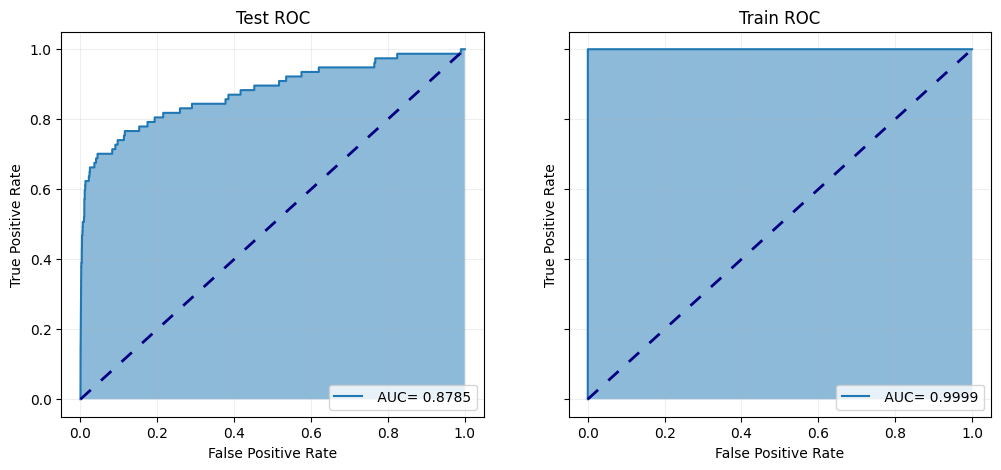

In [76]:
y_pred_proba = pipe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score (y_test, y_pred_proba)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

#create Test ROC curve
ax1.set_title('Test ROC')
ax1.plot (fpr,tpr,label=" AUC= "+str(auc)[:6])
ax1.fill_between(fpr, tpr, alpha=.5)
ax1.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='navy')
ax1.grid(linestyle="-", alpha=.2)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc=4)

y_pred_proba = pipe.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve (y_train, y_pred_proba)
auc = roc_auc_score (y_train, y_pred_proba)

#create Train ROC curve
ax2.set_title('Train ROC')
ax2.plot (fpr,tpr,label=" AUC= "+str(auc)[:6])
ax2.fill_between(fpr, tpr, alpha=.5)
ax2.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='navy')
ax2.grid(linestyle="-", alpha=.2)
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc=4)

plt.show()

In [78]:
y_pred = pipe.predict(X_test)

print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('f1-score=', f1_score(y_test, y_pred))
print('accuracy=', accuracy_score(y_test, y_pred))

precision= 0.631578947368421
recall= 0.3116883116883117
f1-score= 0.41739130434782606
accuracy= 0.9954234972677596


In [79]:
# ground truth balancing needed
y_test.value_counts()

adv/app
0    14563
1       77
Name: count, dtype: int64

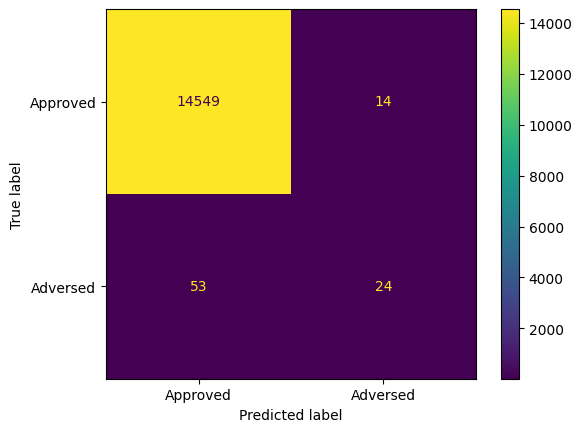

In [68]:
#model is good in detecting true positives, but isn't good at detecting true negatives
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matr = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matr, display_labels = ['Approved', 'Adversed'])

cm_display.plot()
plt.show()

## Trying out ctd dataset 

In [ ]:
# Features (X) and target (y) for primekg
X = cardio_ctd_prepped.drop(columns=['adv/app'])
y = cardio_ctd_prepped['adv/app']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [81]:
base_categorical_features = ['drugA', 'drugB']
base_numerical_features = list(X_train.columns)

for cat in base_categorical_features:
    base_numerical_features.remove(cat)

numeric_transformer = StandardScaler() 
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, base_numerical_features), 
                                               ("cat", categorical_transformer, base_categorical_features)])

pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("classifier",  XGBClassifier())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sAB', 'opAB', 'meanspAB',
                                                   'medianspAB', 'minspAB',
                                                   'maxspAB', 'zTDA', 'zTDB',
                                                   'zDTA', 'zDTB', 'sAD', 'sBD',
                                                   'opAD', 'opBD', 'meanspAD',
                                                   'meanspBD', 'medianspAD',
                                                   'medianspBD', 'minspAD',
                                                   'minspBD', 'maxspAD',
                                                   'maxspBD']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unk...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

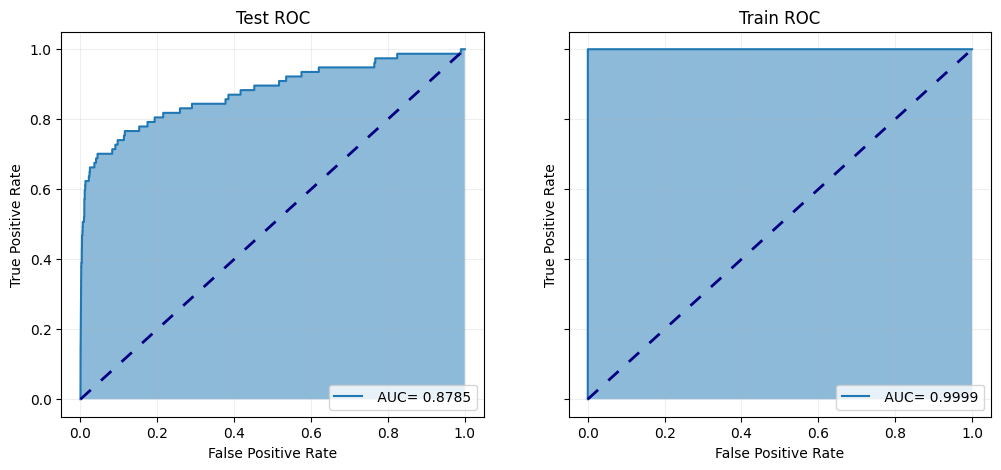

In [82]:
y_pred_proba = pipe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score (y_test, y_pred_proba)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

#create Test ROC curve
ax1.set_title('Test ROC')
ax1.plot (fpr,tpr,label=" AUC= "+str(auc)[:6])
ax1.fill_between(fpr, tpr, alpha=.5)
ax1.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='navy')
ax1.grid(linestyle="-", alpha=.2)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc=4)

y_pred_proba = pipe.predict_proba(X_train)[:,1]
fpr, tpr, _ = roc_curve (y_train, y_pred_proba)
auc = roc_auc_score (y_train, y_pred_proba)

#create Train ROC curve
ax2.set_title('Train ROC')
ax2.plot (fpr,tpr,label=" AUC= "+str(auc)[:6])
ax2.fill_between(fpr, tpr, alpha=.5)
ax2.plot([0,1], [0,1], linestyle=(0, (5, 5)), linewidth=2, color='navy')
ax2.grid(linestyle="-", alpha=.2)
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc=4)

plt.show()

In [83]:
y_pred = pipe.predict(X_test)

print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('f1-score=', f1_score(y_test, y_pred))
print('accuracy=', accuracy_score(y_test, y_pred))

precision= 0.631578947368421
recall= 0.3116883116883117
f1-score= 0.41739130434782606
accuracy= 0.9954234972677596


In [84]:
y_test.value_counts()

adv/app
0    14563
1       77
Name: count, dtype: int64

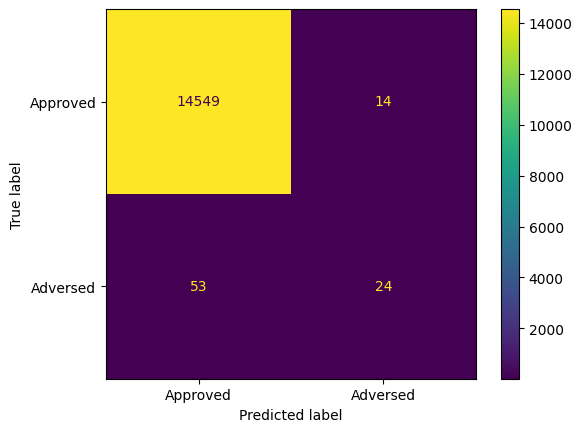

In [86]:
confusion_matr = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matr, display_labels = ['Approved', 'Adversed'])

cm_display.plot()
plt.show()

In [88]:
are_identical =cardio_ctd_prepped.equals(cardio_primekg_prepped)
print(are_identical)

False


## KNN

In [ ]:
#defining types of distances
import numpy as np

def euclidean_distance(X, Y):
    norm_X = np.sum(np.square(X), axis=1)
    norm_Y = np.sum(np.square(Y), axis=1)
    return np.sqrt(norm_Y - 2 * X @ Y.T + np.reshape(norm_X, (X.shape[0], 1)))


def cosine_distance(X, Y):
    norm_X = np.sqrt(np.sum(np.square(X), axis=1))
    norm_X = np.where(norm_X != 0, norm_X, np.nan)
    norm_Y = np.sqrt(np.sum(np.square(Y), axis=1))
    norm_Y = np.where(norm_Y != 0, norm_Y, np.nan)
    res = np.divide(X@Y.T, norm_Y)
    res = np.divide(res, np.reshape(norm_X, (X.shape[0], 1)))
    res = np.where(np.isnan(res), 0, 1 - res)
    return res

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors

#custom KNNClassifier class
class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=5, weights='uniform', metric='euclidean'):
        self.k = k
        self.weights = weights
        self.metric = metric
        self.nn_model = None

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.metric == 'euclidean':
            distance_func = euclidean_distance
        elif self.metric == 'cosine':
            distance_func = cosine_distance
        else:
            raise ValueError("Invalid distance metric. Supported metrics: 'euclidean', 'cosine'.")

        self.nn_model = NearestNeighbors(n_neighbors=self.k, algorithm='brute', metric=distance_func)
        self.nn_model.fit(X)

    def predict(self, X):
        distances, indices = self.nn_model.kneighbors(X)
        if self.weights == 'uniform':
            weights = np.ones_like(distances)
        elif self.weights == 'distance':
            weights = 1.0 / distances
        else:
            raise ValueError("Invalid weight scheme. Supported weights: 'uniform', 'distance'.")

        # Weighted majority voting
        class_counts = np.zeros((X.shape[0], len(np.unique(self.y))))
        for i in range(self.k):
            class_counts += np.eye(len(np.unique(self.y)))[self.y[indices[:, i]]]

        # Get the index of the class with the maximum count
        predicted_classes = np.argmax(class_counts, axis=1)
        return predicted_classes



In [ ]:
import numpy as np

def kfold(n, n_folds):
    res = []
    indexes = np.arange(n)
    folds = np.array(np.array_split(indexes, n_folds))
    for num in range(n_folds):
        arr_test = np.array(folds[num])
        elements = np.arange(n)
        arr_train = elements[np.isin(elements, arr_test, invert=True)]
        res.append((arr_train, arr_test))
    return res


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import clone

y = merged_cardiovascular['adv/app']
X = merged_cardiovascular.drop(columns=['adv/app', 'drugA', 'drugB', 'drugcomb', 'sA', 'sB', 'opA', 'opB'])

# Step 1: Splitting the dataset into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: k-fold cross-validation
n_folds = 5
splits = kfold(len(X_train), n_folds)

# Step 3: Train and evaluate the model on each fold
model = KNNClassifier(k=5, weights='uniform', metric='euclidean')
scores = []

for train_index, val_index in splits:
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
    
    # Clone the model to avoid modifying the original instance
    cloned_model = clone(model)
    cloned_model.fit(X_train_fold, Y_train_fold)
    
    #  predictions on the validation set
    Y_val_pred = cloned_model.predict(X_val_fold)
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(Y_val_fold, Y_val_pred)
    scores.append(accuracy)

# Step 4: Select the best model and evaluate it on the testing set
best_model_index = np.argmax(scores)
best_model = clone(model)
best_model.fit(X_train, Y_train)
Y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)
